**作者：夏子涵**

**日期：2023.4.27**



# 0.导言

我们都知道，气候研究的时间跨度一般都较长，基本都在30年以上，这就意味着对应的数据集十分庞大，既不能简单地对数据进行描述，也无法轻易地从数据中提取特征。那么面对如此庞大的数据集，我们如何才能从中提取出最能描述它的主要特征呢?

在这种场景下，EOF分解就显示出它的强大优势了。**它可以把随着时间变化的气象要素场，分解为 空间函数部分 和 时间函数部分，从而便于我们开展分析和研究，让我们能够从庞大的气候数据中抓住他们的主要特征。**本文将介绍EOF的基本原理，以及在python中如何实现EOF分解。如有不妥之处，还请大家不吝赐教!

# 1.什么是经验正交分解

经验正交分解(Empirical orthogonal function，EOF，以下简称“EOF分解”)又被称为主成分分析(Principal component analysis，PCA)，最早由Pearson提出，20世纪50年代Lorenz将该方法引入大气科学领域，随后被广泛应用至今。

EOF分解是一种分析矩阵数据中的结构特征、提取主要数据特征量的方法。

EOF分解的分析对象，就是我们在气象科研和业务工作中，经常要分析各种气象要素场，如海表温度场、气压场、降水场等。这些气象要素场大多由不规则的网格点所组成。如果我们抽取这些场的某一段历史时期的资料，就构成一组以网格点为空间点(可看作多个变量)的随时间变化的样本。

**EOF分解所做的，就是把随时间变化的气象要素场分解为 空间函数部分 和 时间函数部分，且这两部分相互正交。**

其中，空间函数部分可在一定程度上概括要素场的空间分布特点，这部分是不随时间变化的；而时间函数部分则由空间点(即多个变量)的线性组合所构成，称为主分量。

由于这些主分量中前几个就可能占有原空间点(即多个变量)总方差的很大部分，即通过EOF分解可以很容易地将原始要素场的变化信息浓缩在前几个主分量及其对应的空间函数上，所以，EOF分解常被用于气象要素场时空变化特征规律的提取和研究。

# 2.基本原理

在气象科研和业务工作中，我们经常会分析某一气象要素的时空数据集，它们大多是3维的，包括2维的空间场以及1维的时间序列。其中2维空间场对应着一个个的空间点，1维的时间序列对应着观测的时间点。

现在假设我们要对某一个气象要素的时空数据集进行研究，它共有 m 个空间点 ($x_1,x_2,···,x_m$), n 个时间点 ($t_1,t_2,···,t_n$)。那对于这样一个时空数据集，我们就可以用一个 $m×n$ 的矩阵 $F$ 来表示。

其中 $F$ 的行对应着某个空间点在观测期内所有时间点上的值，$F$ 的列对应着某个时间点在观测区域内所有空间点上的值。

$$
F=
\begin{pmatrix} 
    f_{11} & f_{12} & ··· & f_{1n}\\  
    f_{21} & f_{22} & ··· & f_{2n}\\
    ··· & ··· & ··· & ···\\
    f_{m1} & f_{m2} & ··· & f_{mn}\\
\end{pmatrix}
$$

而我们的EOF分解方法，就是将时空数据集 $F$ 分解为空间函数 $V$ 和时间函数 $Z$ 两部分，即

$$
F=VZ
$$

$$
\begin{pmatrix} 
    f_{11} & f_{12} & ··· & f_{1n}\\  
    f_{21} & f_{22} & ··· & f_{2n}\\
    ··· & ··· & ··· & ···\\
    f_{m1} & f_{m2} & ··· & f_{mn}\\
\end{pmatrix}
=
\begin{pmatrix} 
    v_{11} & v_{12} & ··· & v_{1m}\\  
    v_{21} & v_{22} & ··· & v_{2m}\\
    ··· & ··· & ··· & ···\\
    v_{m1} & v_{m2} & ··· & v_{mm}\\
\end{pmatrix}
\begin{pmatrix} 
    z_{11} & z_{12} & ··· & z_{1n}\\  
    z_{21} & z_{22} & ··· & z_{2n}\\
    ··· & ··· & ··· & ···\\
    z_{m1} & z_{m2} & ··· & z_{mn}\\
\end{pmatrix}
$$

也可表示为

$$
F_{it}=\sum_{k=1}^{m}v_{ik}z_{kt}=v_{i1}z_{1t}+v_{i2}z_{2t}+···+v_{im}z_{mt}
$$

其中下标 $i=1,2,···,m$ 表示空间点，下标 $t=1,2,···,n$ 表示时间点。

因此，该分解式的含义为：气象要素场中第 $i$ 个空间点上的第 $t$ 次观测值，可以看作是 m 个空间函数 $v_{i1},v_{i2},···,v_{im}$ 和 m 个时间函数 $z_{1t},z_{2t},···,z_{mt}$ 的线性组合。

在空间函数 $V$ 中，它的每一列(如第k列，可表示为 $\mathbf{v_k}=(v_{1k},v_{2k},···,v_{mk})$ 都可以看作为一个典型场，称为一个空间模态(EOF)， 它只跟空间点有关，而与时间无关。

在时间函数 $Z$ 中，它的每一行(如第k行，可表示为 $\mathbf{z_k}=(z_{k1},z_{k2},···,z_{kn})$ 都可以看作是一个时间序列，称为时间系数(PC)。

在此基础上，时空数据集 $F$ 中第 t 时刻的空间场(共有m个空间点)，就可以表示为

$$
\begin{pmatrix} 
    f_{1t} \\  
    f_{2t} \\
    ··· \\
    f_{mt} \\
\end{pmatrix}
=
\begin{pmatrix} 
    v_{11} \\  
    v_{21}  \\
    ··· \\
    v_{m1} \\
\end{pmatrix}
z_{1t}
+
\begin{pmatrix} 
    v_{12} \\  
    v_{22} \\
    ··· \\
    v_{m2} \\
\end{pmatrix}
z_{2t}
+
···
+
\begin{pmatrix} 
    v_{1m} \\  
    v_{2m} \\
    ··· \\
    v_{mm} \\
\end{pmatrix}
z_{mt}
$$



该式表明，时空数据集中第 t 时刻的空间场可以表示为 m 个空间模态($\mathbf{v_1},\mathbf{v_2},···,\mathbf{v_m}$)，按照不同的权重线性 ($z_{1t},z_{2t},···,z_{mt}$) 叠加而成。

对于任意一个空间模态 $\mathbf{v_k}$ 而言，其在不同时刻对应的权重有所不同，若将其在全部观测时间点所对应的权重 $(z_{k1},z_{k2},···,z_{kn})$ 列在一起，就是我们上面提到的时间系数 $\mathbf{z_k}$。

每一个空间模态都对应着一个自己的时间系数 $\mathbf{z_k}$，如果$\mathbf{z_k}$中的正值的绝对值越大，表明该时间点所对应的数据集与该时间系数所对应的空间模态相似度越高；如果$\mathbf{z_k}$中的负值的绝对值越大，则表明该时间点所对应的数据集越倾向于和该时间系数所对应的空间模态呈相反的状态。

除此以外，我们还可以根据每一个空间模态(或时间系数)计算该空间模态(或时间系数)对应的**方差贡献率**，方差贡献率越高，表明该空间模态(或时间系数)所包含的关于原始数据的变化信息越多。

我们通常根据方差贡献率的大小对空间模态进行排序，方差贡献率最大的称为第一空间模态，方差贡献率第二大的称为第二空间模态，以此类推。

因为所有空间模态(或时间系数)所对应的方差贡献率加起来等于 1，所以，当方差贡献率最高的几个空间模态(或时间系数)加起来得到的累计方差贡献率较大时(比如达到80%)，我们就会用它们几个来表示原始数据中所包含的主要特征。

但需要强调的是，**EOF分解只是一种统计方法，其得到的分解结果本身没有任何的物理意义，需要我们结合实际及专业知识去对结果进行理解和解释的。**

# 3.在Python实现EOF分解

In [1]:
import struct
import numpy as np
import xarray as xr
from eofs.xarray import Eof

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import cartopy.crs as ccrs       
import cartopy.feature as cfeature 
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator, LongitudeLocator)
import cmaps
import warnings
warnings.filterwarnings('ignore')


## 3.1进行EOF分析

In [2]:
# 读取数据方法一
'''
filename = 'ssta.dat'
f = open(filename,'rb')
N = 56*11*336
data_raw = struct.unpack('f'*N,f.read(4*N))
f.close()
data = np.reshape(data_raw,(56, 11, 336), order='F')
'''

"\nfilename = 'ssta.dat'\nf = open(filename,'rb')\nN = 56*11*336\ndata_raw = struct.unpack('f'*N,f.read(4*N))\nf.close()\ndata = np.reshape(data_raw,(56, 11, 336), order='F')\n"

In [3]:
# 读取数据方法二

data = np.fromfile('ssta.dat', dtype='float32')
data = np.reshape(data,(56, 11, 336), order='F')
lon = np.arange(160, 272, 2) #经度160E~90W（间隔2度)
lat = np.arange(-10, 12, 2)  #纬度10S~10N（间隔2度） 
time = xr.cftime_range(start='1979-01', end='2006-12', freq='MS') #时间1979.1~2006.12（逐月)
ds = xr.Dataset({'ssta': ([ 'lon', 'lat', 'time'], data)},
                coords={'lon': lon, 'lat': lat, 'time': time})

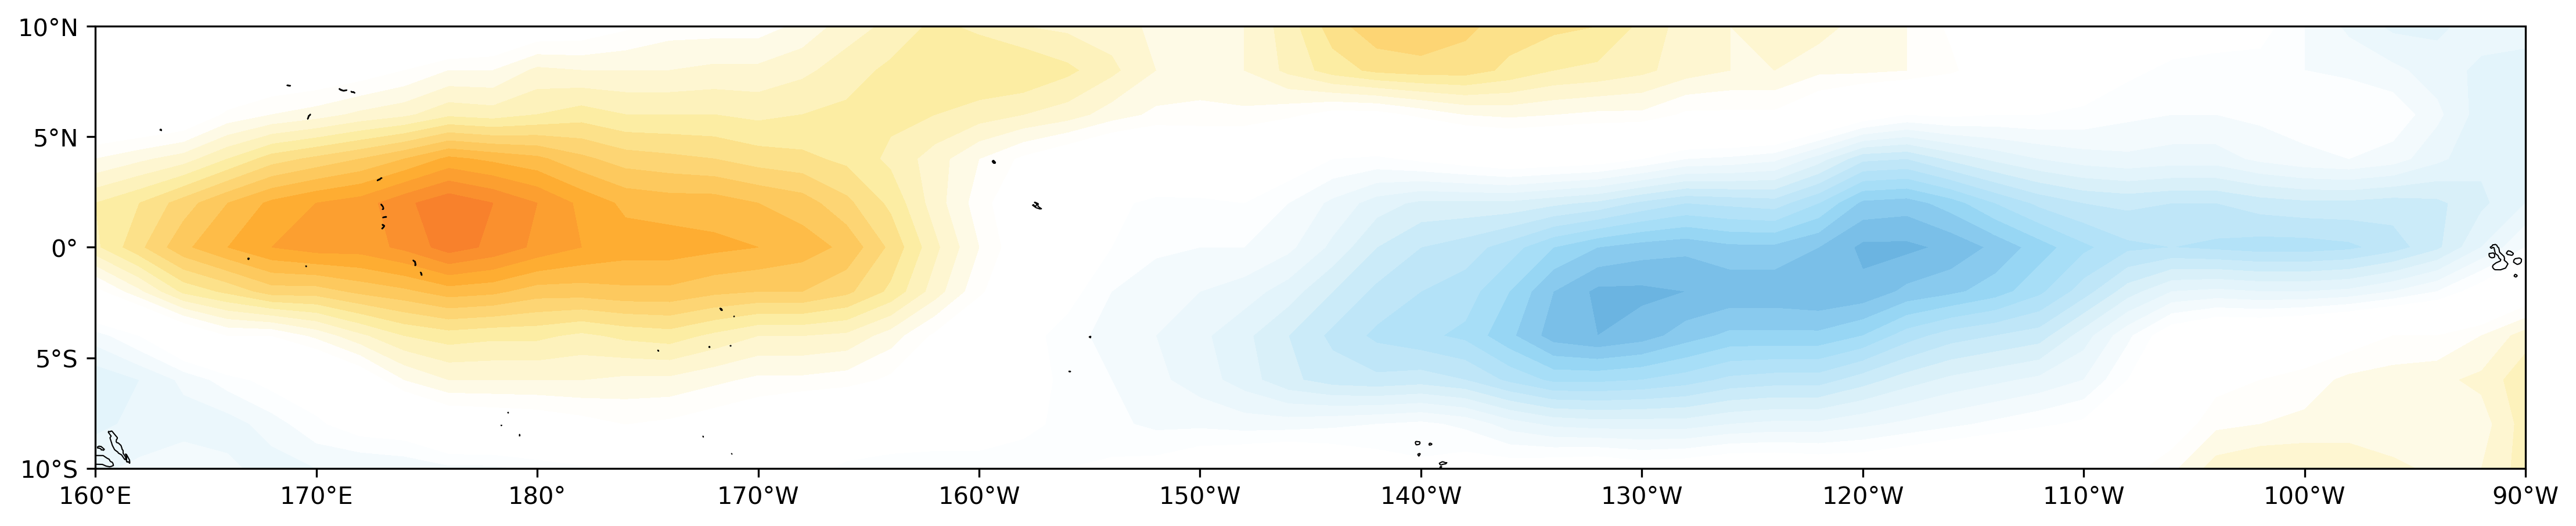

In [4]:
fig = plt.figure(figsize=(18, 12), dpi=300)  
projection = ccrs.PlateCarree(central_longitude=180) #指定投影为经纬度投影，中心经纬度为180°
ax1 = fig.add_subplot(1, 1, 1, projection=projection) #绘制第一个子图
projection = ccrs.PlateCarree(central_longitude=180) #指定投影为经纬度投影，并指定中心经度为180°
# 设置地图范围，经度为（160, 270)，纬度为（-10, 10）
ax1.set_extent([-20, 90, -10, 10], crs=ccrs.PlateCarree(central_longitude=180))
# 设置经纬度标签
ax1.set_xticks([-20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], crs=projection)
ax1.set_yticks([-10, -5, 0, 5, 10], crs=projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True) #给标签添加对应的N,S,E,W
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.contourf(ds.lon,ds.lat,ds.ssta[:,:,0].transpose('lat', 'lon'), np.linspace(-1,1,51),cmap=cmaps.BlueWhiteOrangeRed,transform=ccrs.PlateCarree())  #在第一个地图上绘制第一空间模态的填充色图，EOFs[0]表示从EOF中取出第一个空间模态
ax1.coastlines(color='k', lw=0.5)                #添加海岸线
ax1.add_feature(cfeature.LAND, facecolor='white') #添加陆地

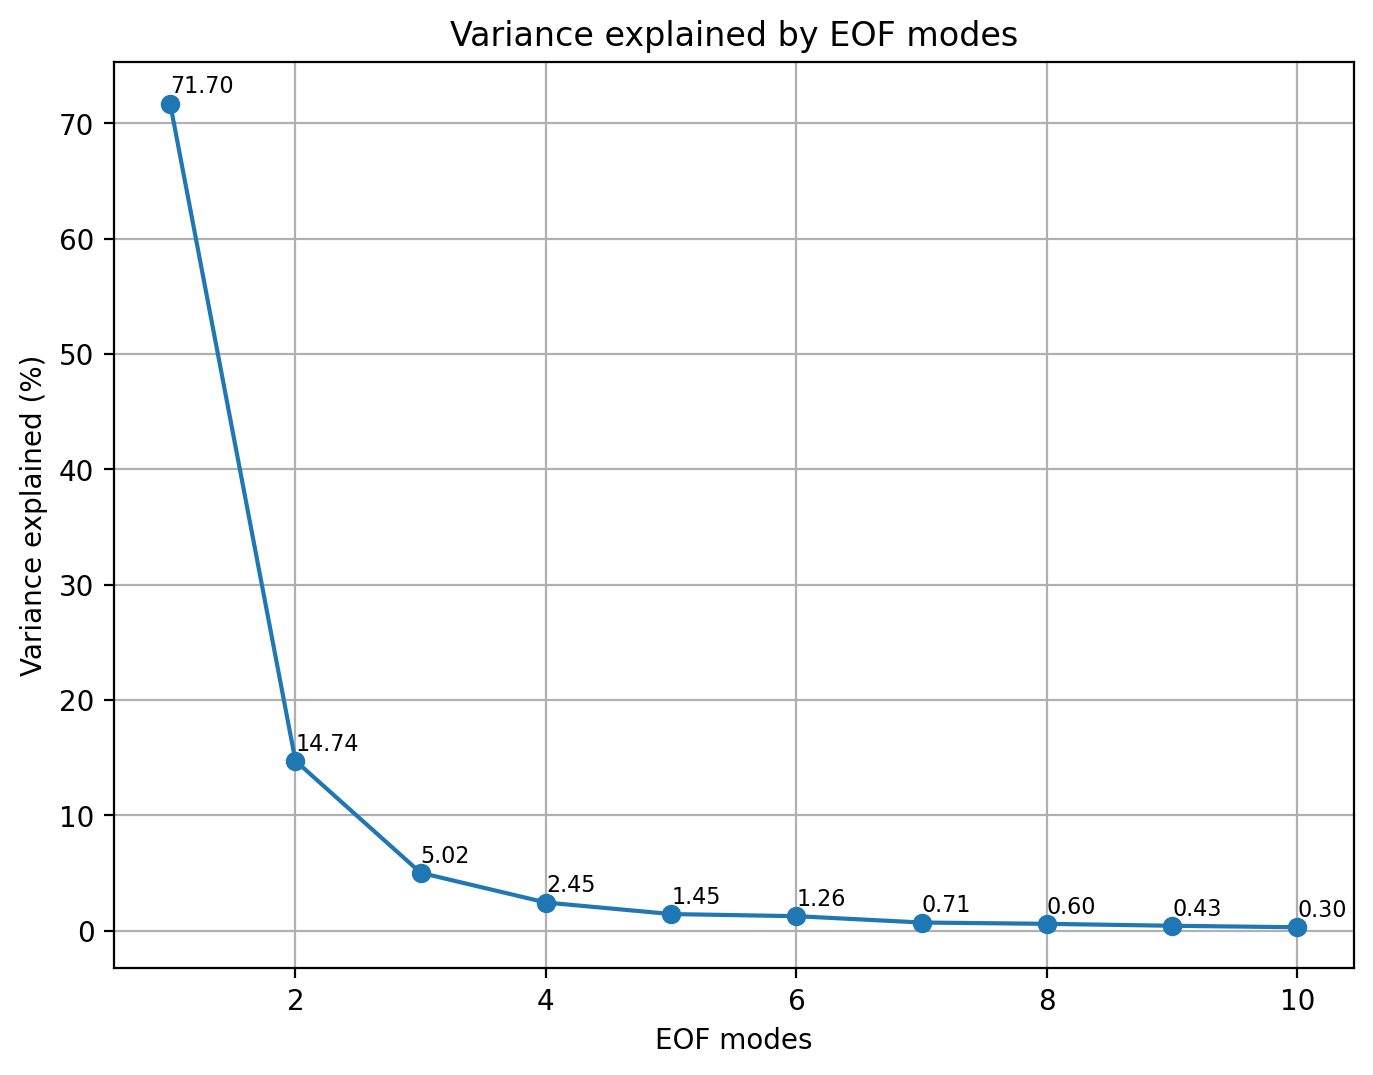

In [5]:
# 转置数据
ds = ds.transpose('time', 'lat', 'lon')

#计算网格点的权重
coslat = np.cos(np.deg2rad(ds.coords['lat'].values)) 
wgts = np.sqrt(coslat)[..., np.newaxis]

# 计算EOF分解
solver = Eof(ds['ssta'], weights=wgts, center=False)
eofs = solver.eofs(neofs=10, eofscaling=2)
pcs = solver.pcs(npcs=10, pcscaling=1)
variance = solver.varianceFraction(neigs=10)

# 绘制方差解释率图
plt.figure(figsize=(8, 6),dpi=200)
plt.plot(np.arange(1, 11), variance[:10]*100, 'o-')
plt.xlabel('EOF modes')
plt.ylabel('Variance explained (%)')
plt.title('Variance explained by EOF modes')
plt.grid()
# 在每个点上添加文本标签
for i, v in enumerate(variance.values[:10]*100):
    plt.text(i+1, v+0.9, f'{v:.2f}', fontsize=8, color='black')
plt.show()


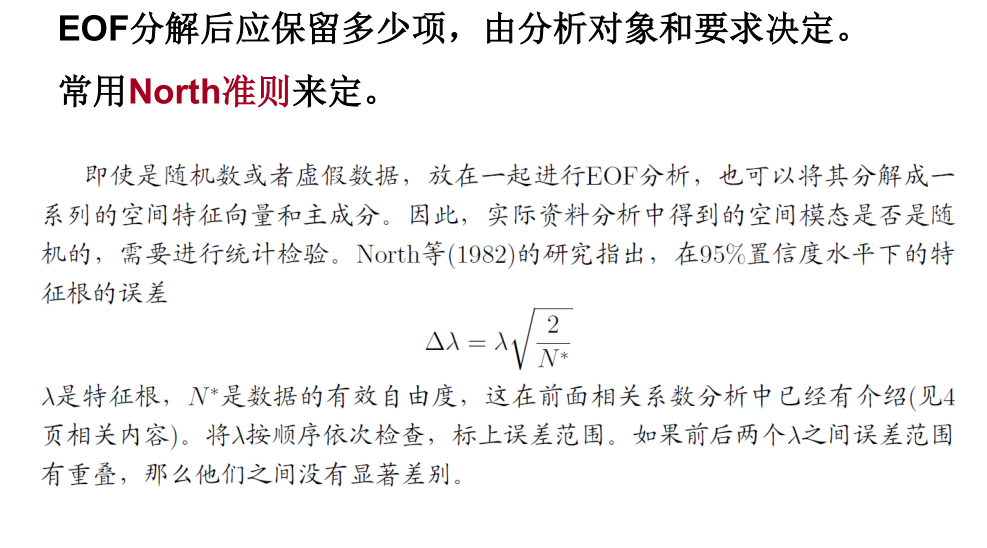

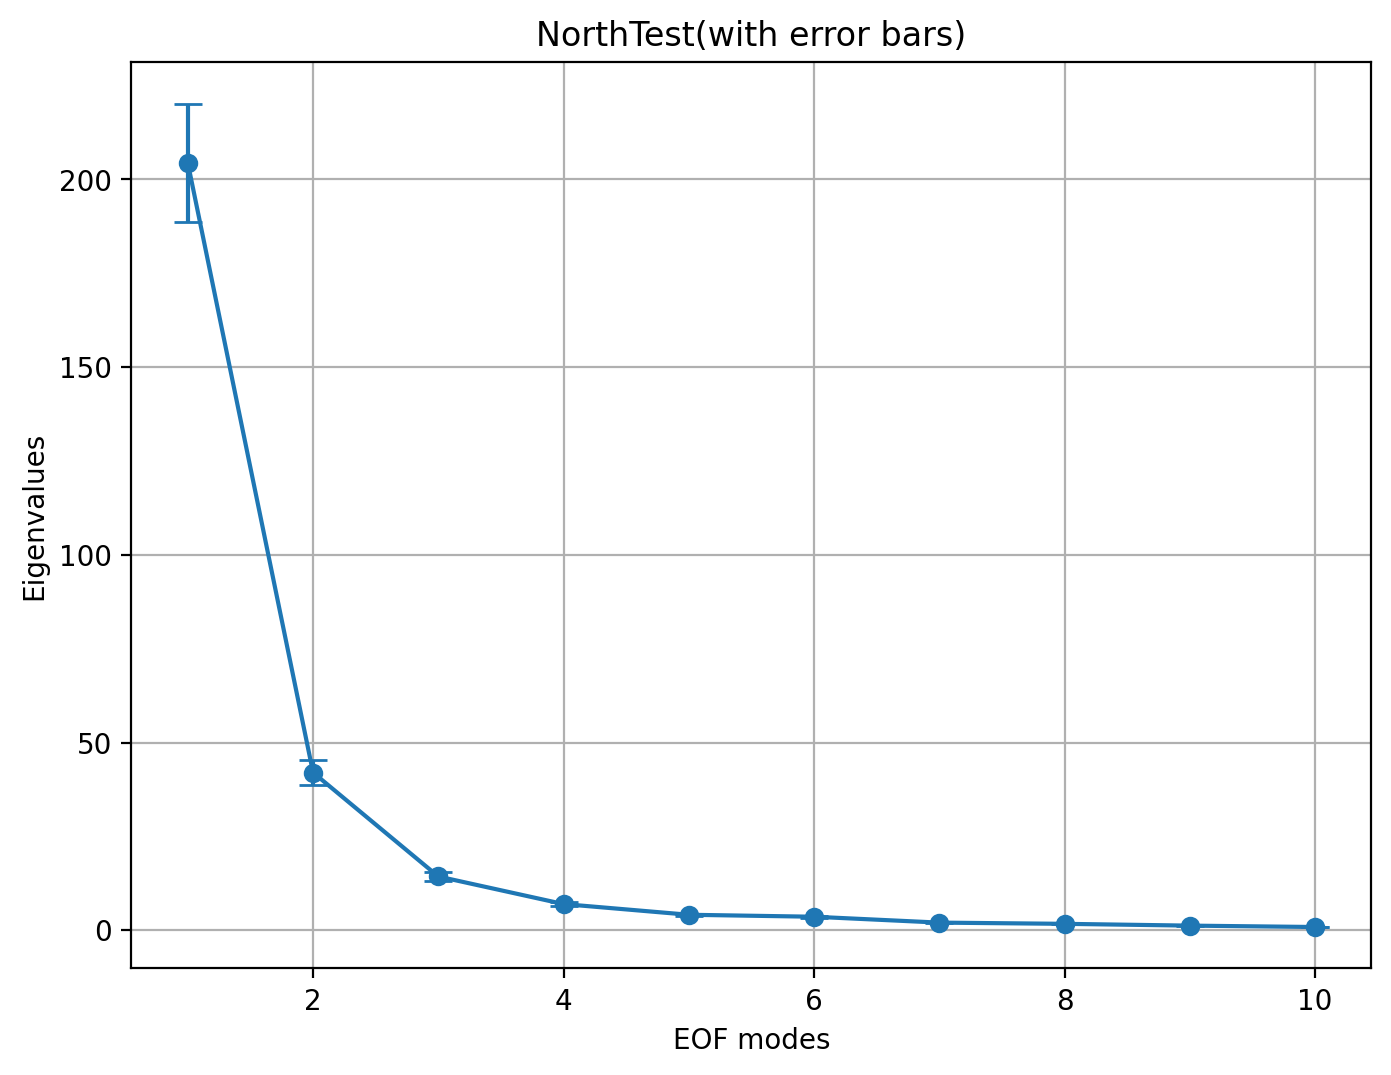

In [6]:
#计算特征值和NorthTest的结果
eigenvalues = solver.eigenvalues(neigs=10)
errors = solver.northTest(neigs=10)
# 绘制Error Bar图
plt.figure(figsize=(8, 6),dpi=200)
plt.errorbar(np.arange(1, 11), eigenvalues, yerr=errors, fmt='o-', capsize=5)
plt.xlabel('EOF modes')
plt.ylabel('Eigenvalues')
plt.title('NorthTest(with error bars)')
plt.grid()
plt.show()

In [7]:
eigenvalues + errors

<xarray.DataArray (mode: 10)>
array([220.1664    ,  45.25166   ,  15.425778  ,   7.5122457 ,
         4.444933  ,   3.8782926 ,   2.1901467 ,   1.8424128 ,
         1.3281171 ,   0.92983884], dtype=float32)
Coordinates:
  * mode     (mode) int32 0 1 2 3 4 5 6 7 8 9

In [8]:
eigenvalues - errors

<xarray.DataArray (mode: 10)>
array([188.62727  ,  38.7693   ,  13.216016 ,   6.436107 ,   3.8081906,
         3.322722 ,   1.8764055,   1.5784849,   1.1378627,   0.7966382],
      dtype=float32)
Coordinates:
  * mode     (mode) int32 0 1 2 3 4 5 6 7 8 9

## 3.2给出前4个模态的空间分布和时间序列（前4个modes的误差棒无相重叠部分）

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import cmaps

def mapart(ax):
    '''
    添加地图元素
    '''
    # 指定投影为经纬度投影，并指定中心经度为180°
    projection = ccrs.PlateCarree(central_longitude=180)
    # 设置地图范围，经度为（160, 270)，纬度为（-10, 10）
    ax.set_extent([-20, 90, -10, 10], crs=ccrs.PlateCarree(central_longitude=180))
    # 设置经纬度标签
    ax.set_xticks([-20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90], crs=projection)
    ax.set_yticks([-10, -5, 0, 5, 10], crs=projection)
    # 给标签添加对应的N,S,E,W
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 添加海岸线
    #ax.coastlines(color='k', lw=0.5)
    # 添加陆地
    #ax.add_feature(cfeature.LAND, facecolor='white')

def eof_contourf(EOFs, PCs, pers):
    '''
    绘制EOF填充图
    '''
    plt.close
    # 将方差转换为百分数的形式，如0.55变为55%
    pers=(pers*100).values
    # 指定画布大小以及像素
    fig = plt.figure(figsize=(18, 12), dpi=300)
    # 指定投影为经纬度投影，中心经纬度为180°
    projection = ccrs.PlateCarree(central_longitude=180)
    # 将横坐标转换为日期格式
    dates_num = [mdates.date2num(t) for t in time]
    
    # 绘制第一个子图
    ax1 = fig.add_subplot(4, 2, 1, projection=projection)
    # 为第一个子图添加地图底图
    mapart(ax1)
    # 在第一个地图上绘制第一空间模态的填充色图，EOFs[0]表示从EOF中取出第一个空间模态
    p = ax1.contourf(ds.lon,
    ds.lat,
    EOFs[0],
    np.linspace(-1, 1, 51),
    cmap=cmaps.BlueWhiteOrangeRed,
    transform=ccrs.PlateCarree(),
    extend='both')
    # 为第一个子图添加标题，其中，pers[0]表示从pers中取出第一个空间模态对应的方差贡献率
    ax1.set_title('mode1 (%s' % (round(pers[0], 2))+"%)", loc='left')
    ax1.set_aspect(1.6)

    # 绘制第二个子图
    ax2 = fig.add_subplot(4, 2, 2) 
    ax2.set_xticks(dates_num[::108])  # 每9年的1月作为横坐标标签
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(ticker.FixedLocator(dates_num[::108]))  # 每9年的1月作为横坐标刻度线
    b = ax2.bar(dates_num, PCs[:, 0], width=50, color='r')
    # 对时间系数值小于0的柱子设置为蓝色
    for bar, height in zip(b, PCs[:, 0]):
        if height < 0:
            bar.set(color='blue') 
    # 为第二个子图添加标题
    ax2.set_title('PC1' % (round(pers[0], 2)), loc='left') 
    


    # 后面ax3和ax5与ax1绘制方法相同，ax4和ax6与ax2绘制方法相同，不再注释

    ax3 = fig.add_subplot(4, 2, 3, projection=projection) 
    mapart(ax3)
    pp = ax3.contourf(ds.lon,
                      ds.lat,
                      EOFs[1],
                      np.linspace(-1, 1, 51),
                      cmap=cmaps.BlueWhiteOrangeRed,
                      transform=ccrs.PlateCarree(),
                      extend='both')
    ax3.set_title('mode2 (%s' % (round(pers[1], 2))+"%)", loc='left')
    ax3.set_aspect(1.6)

    ax4 = fig.add_subplot(4, 2, 4)
    ax4.set_xticks(dates_num[::108])  # 每9年的1月作为横坐标标签
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax4.xaxis.set_major_locator(ticker.FixedLocator(dates_num[::108]))  # 每9年的1月作为横坐标刻度线
    ax4.set_title('PC2' % (round(pers[1], 2)), loc='left')
    bb = ax4.bar(dates_num, PCs[:, 1], width=50, color='r')
    for bar, height in zip(bb, PCs[:, 1]):
        if height < 0:
            bar.set(color='blue')

    ax5 = fig.add_subplot(4, 2, 5, projection=projection)
    mapart(ax5)
    ppp = ax5.contourf(ds.lon,
                       ds.lat,
                       EOFs[2],
                       np.linspace(-1, 1, 51),
                       cmap=cmaps.BlueWhiteOrangeRed,
                       transform=ccrs.PlateCarree(),
                       extend='both')
    ax5.set_title('mode3 (%s' % (round(pers[2], 2))+"%)", loc='left')
    ax5.set_aspect(1.6)

    ax6 = fig.add_subplot(4, 2, 6)
    ax6.set_xticks(dates_num[::108])  # 每9年的1月作为横坐标标签
    ax6.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax6.xaxis.set_major_locator(ticker.FixedLocator(dates_num[::108]))  # 每9年的1月作为横坐标刻度线
    ax6.set_title('PC3' % (round(pers[2], 2)), loc='left')
    bbb = ax6.bar(dates_num, PCs[:, 2], width=50, color='r')
    for bar, height in zip(bbb, PCs[:, 2]):
        if height < 0:
            bar.set(color='blue')
            
    ax7 = fig.add_subplot(4, 2, 7, projection=projection)
    mapart(ax7)
    pppp = ax7.contourf(ds.lon,
    ds.lat,
    EOFs[3],
    np.linspace(-1, 1, 51),
    cmap=cmaps.BlueWhiteOrangeRed,
    transform=ccrs.PlateCarree(),
    extend='both')
    ax7.set_title('mode4 (%s' % (round(pers[3], 2))+"%)", loc='left')
    ax7.set_aspect(1.6)

    ax8 = fig.add_subplot(4, 2, 8) 
    ax8.set_xticks(dates_num[::108])  # 每9年的1月作为横坐标标签
    ax8.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax8.xaxis.set_major_locator(ticker.FixedLocator(dates_num[::108]))  # 每9年的1月作为横坐标刻度线
    #ax8.set_xlim(dates_num[0], dates_num[-1])
    bbbb = ax8.bar(dates_num, PCs[:, 3], width=50, color='r') 
    for bar, height in zip(bbbb, PCs[:, 3]):
        if height < 0:
            bar.set(color='blue') 
    ax8.set_title('PC4' % (round(pers[3], 2)), loc='left') 



    # 为柱状图添加0标准线
    ax2.axhline(y=0,  linewidth=1, color='k', linestyle='-')
    ax4.axhline(y=0,  linewidth=1, color='k', linestyle='-')
    ax6.axhline(y=0,  linewidth=1, color='k', linestyle='-')
    ax8.axhline(y=0,  linewidth=1, color='k', linestyle='-')

    # 在图下边留白边放colorbar
    fig.subplots_adjust(bottom=0.1)
    # colorbar位置： 左 下 宽 高
    l = 0.25
    b = 0.04
    w = 0.6
    h = 0.015
    # 对应 l,b,w,h；设置colorbar位置；
    rect = [l, b, w, h]
    cbar_ax = fig.add_axes(rect)

    # 绘制colorbar
    c = plt.colorbar(
        p,
        cax=cbar_ax,
        orientation='horizontal',
        aspect=20,
        pad=0.1) 

    # 设置colorbar的标签大小
    c.ax.tick_params(labelsize=14) 

    # 调整子图之间的间距
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()

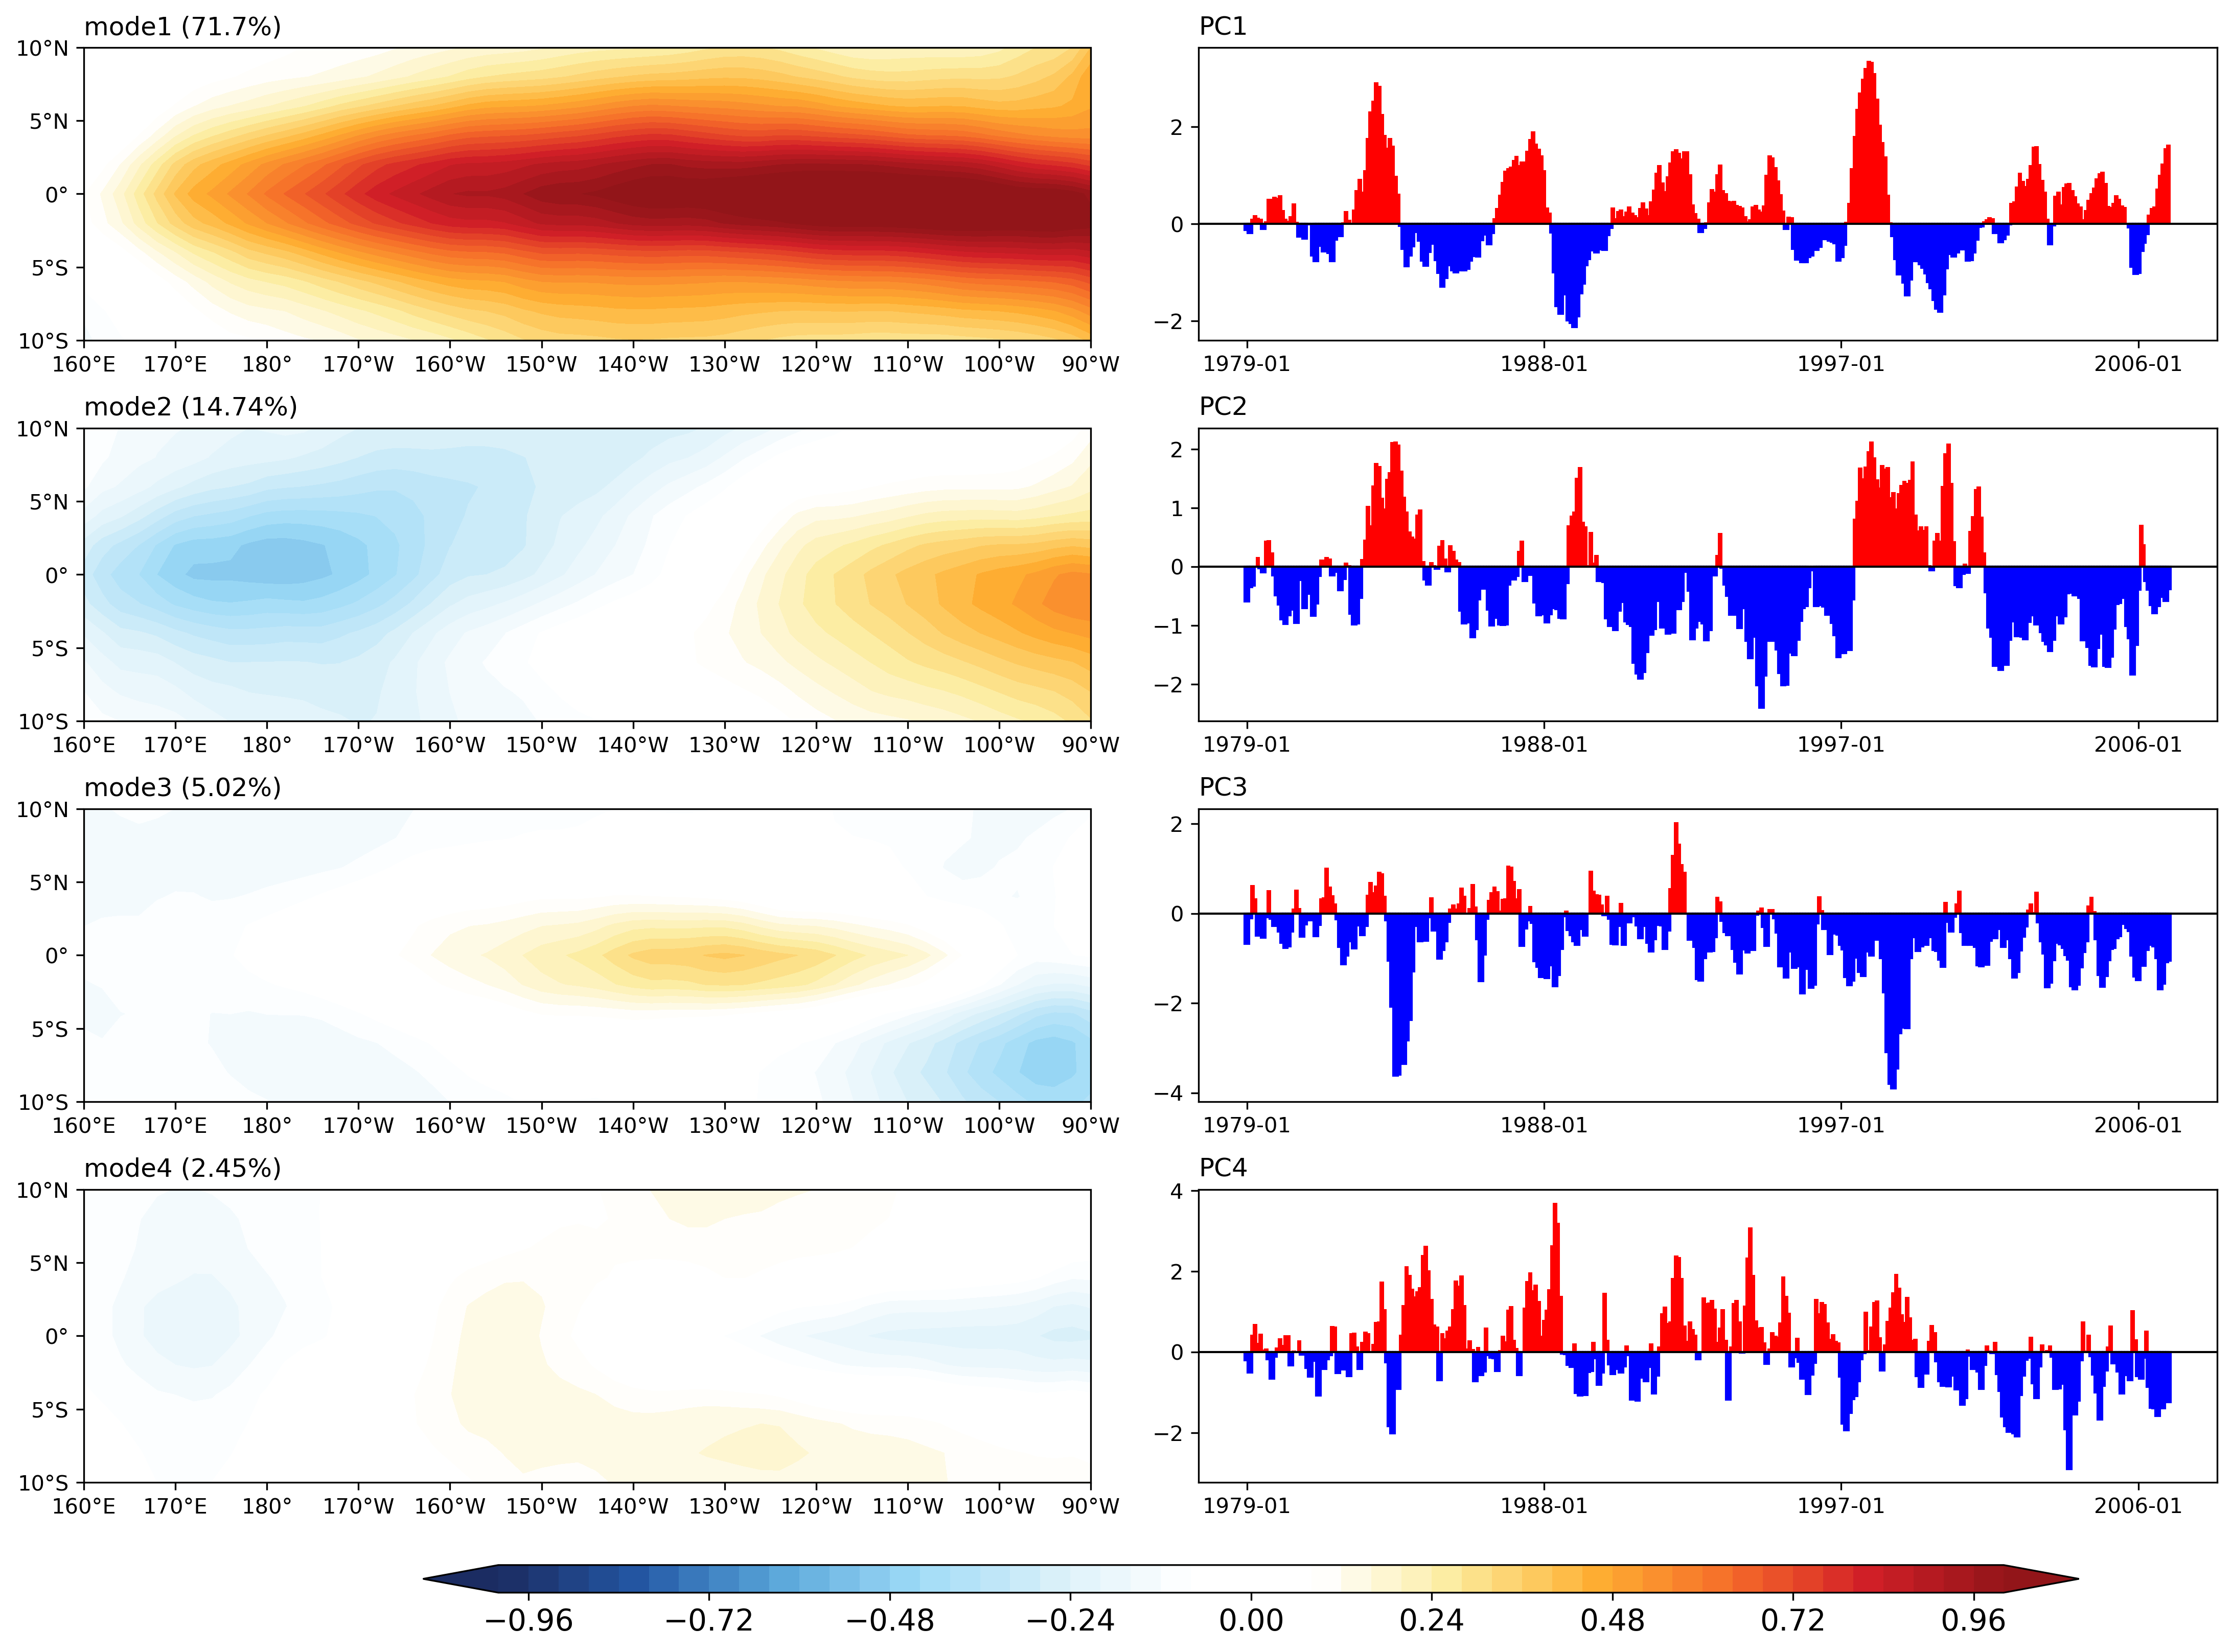

In [10]:
eof_contourf(eofs[:4]*(-1),pcs[:,:4]*(-1),variance[:4])

参考：
> [经验正交方程EOF-原理，代码，气象学实例，文献解读](https://www.bilibili.com/video/BV16i4y1o7sK/)

> 《气象统计分析与预报方法第4版 黄嘉佑》

> USTC气象统计方法课程-郑建秋

> [经验正交分解(EOF) 夏子涵](https://www.heywhale.com/mw-org/task_62c25ec80123ec8270e742af/project/644a6c8904ddb21f384ea9a4?run=&workflow=)